<a href="https://colab.research.google.com/github/lawlli/AI_ML_TASKS_INTERNSHIP_2024/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load the datasets
train_dataset_url = "/content/train.csv"
test_dataset_url = "/content/test.csv"
df_train = pd.read_csv(train_dataset_url)
df_test = pd.read_csv(test_dataset_url)

In [ ]:

# Display basic information about the training dataset
print("Columns in the Training Dataset:")
print(df_train.columns)

Columns in the Training Dataset:
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


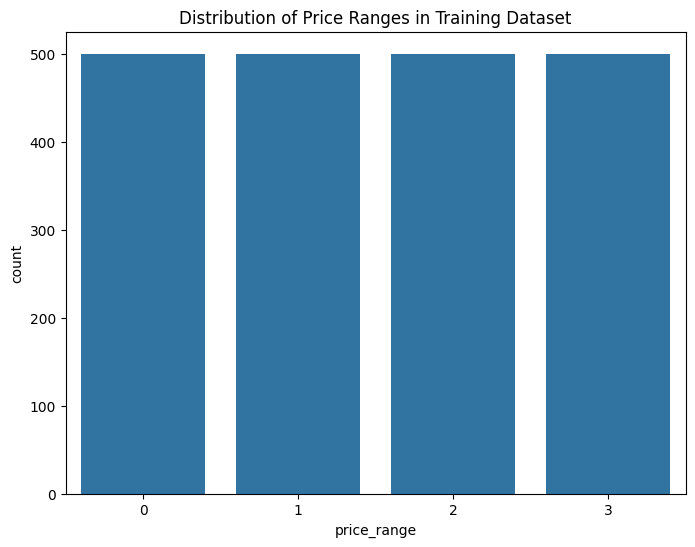

In [ ]:

# Check if 'price_range' is present in the training dataset
if 'price_range' in df_train.columns:
    # Visualize the distribution of the target variable 'price_range' in the training dataset
    plt.figure(figsize=(8, 6))
    sns.countplot(x='price_range', data=df_train)
    plt.title('Distribution of Price Ranges in Training Dataset')
    plt.show()

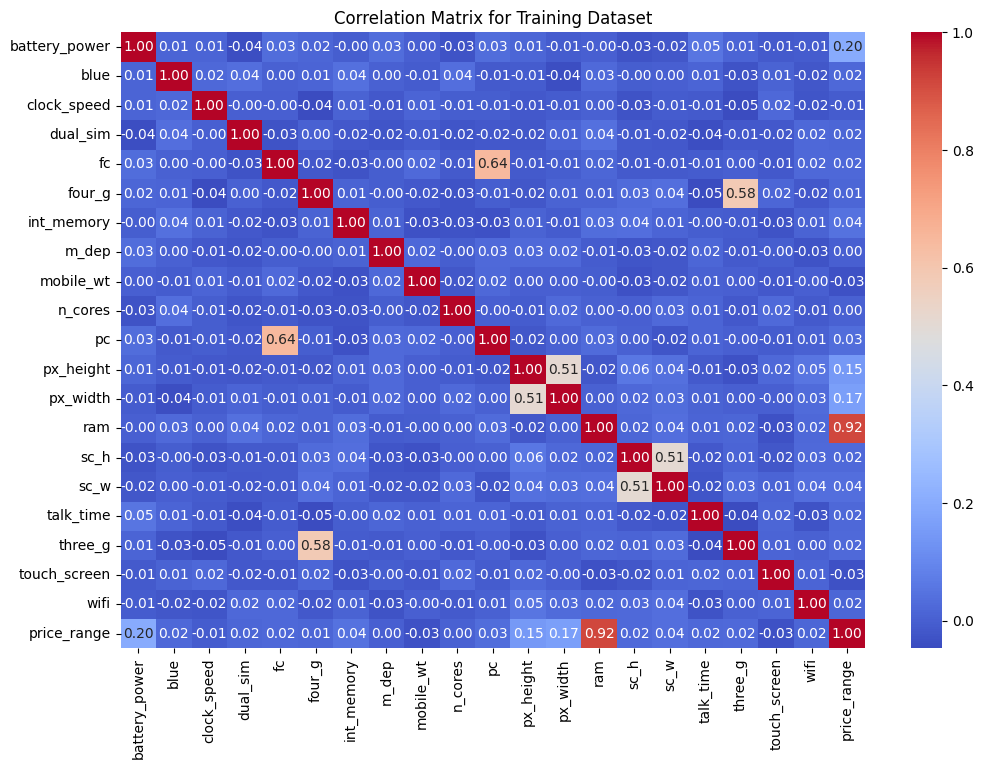

In [ ]:
 # Visualize the correlation matrix for the training dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Training Dataset')
plt.show()

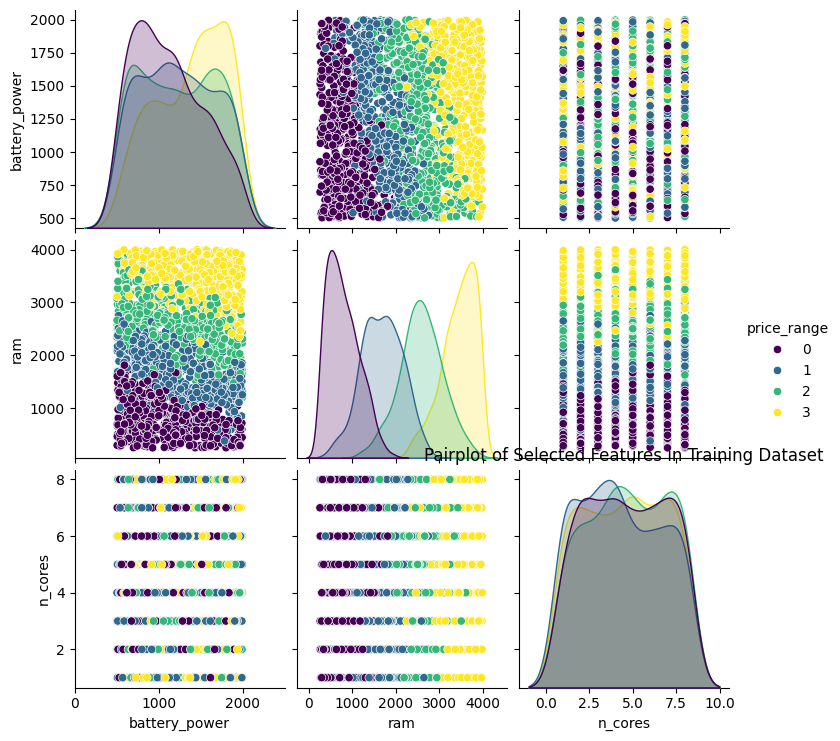

In [ ]:

 # Pairplot for selected features in the training dataset
selected_features = ['battery_power', 'ram', 'n_cores', 'price_range']
sns.pairplot(df_train[selected_features], hue='price_range', palette='viridis')
plt.title('Pairplot of Selected Features in Training Dataset')
plt.show()


In [ ]:
 # Split the training data into features (X_train) and target variable (y_train)
X_train = df_train.drop('price_range', axis=1)
y_train = df_train['price_range']


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predictions on the testing dataset
rf_predictions = rf_classifier.predict(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_valid, rf_predictions)

1.0

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_preds = xgb_model.predict(X_valid)

In [ ]:
accuracy_score(y_valid, xgb_preds)

0.905